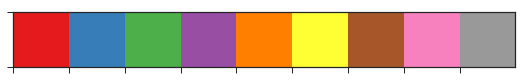

In [233]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import pandas as pd
import seaborn as sns
colors = sns.color_palette('Set1', 9)
sns.palplot(colors)
sns.set(
    style='ticks',
    font_scale=1.5
)

In [244]:
def F(η, W, w, k, l):
    return (1+η*(W/w-1))**k * (1+η*(w/W-1))**l

def l0(k, η, W, w):
    return k * (1 + (1 - η) * (W-w)/w) 

def l1(k, η, W, w):
    return k * (1 + ((1 - η)*(W - w)/w) / (1 + η*(1 - η)*(W - w)**2/(W * w))) 

def l2(k, η, W, w):
    return 0

analytic: l0 = 364.0
analytic: l1 = 227.39155581260843
analytic: l2 = 0
numerical: l0 = [ 272.22956712] [ 1.]


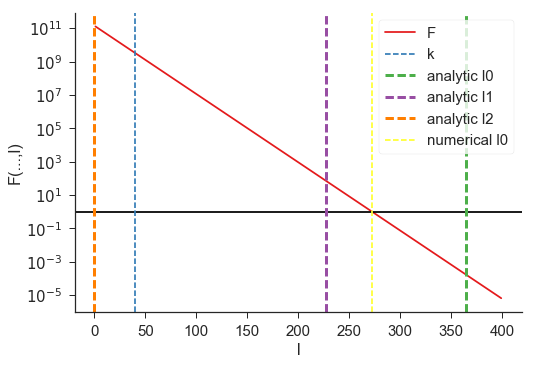

In [245]:
η = 0.1
W = 1
w = 0.1
k = 40
l0_ = l0(k, η, W, w)
print("analytic: l0 =", l0_)
l1_ = l1(k, η, W, w)
print("analytic: l1 =", l1_)
l2_ = l2(k, η, W, w)
print("analytic: l2 =", l2_)
res = scipy.optimize.root(lambda l: F(η, W, w, k, l) - 1, k)
assert res.success
print('numerical: l0 =', res.x, F(η, W, w, k, res.x))

ls = np.arange(1, 10*k)
plt.plot(
    ls,
    F(η, W, w, k, ls),
    label='F',
    color=colors[0],
)
plt.yscale('log')
plt.xlabel('l')
plt.ylabel('F(...,l)')
plt.axhline(1, ls='-', color='k')
plt.axvline(k, ls='--', color=colors[1], label='k')
plt.axvline(l0_, ls='--', lw=3, color=colors[2], label='analytic l0')
plt.axvline(l1_, ls='--', lw=3, color=colors[3], label='analytic l1')
plt.axvline(l2_, ls='--', lw=3, color=colors[4], label='analytic l2')
plt.axvline(res.x, ls='--', color=colors[5], label='numerical l0')
plt.legend(frameon=True)
sns.despine()

In [198]:
η = np.logspace(-4, -1, 50)
W = 1
w = np.logspace(-2, -1, 50)
k = np.logspace(0, 3, 50)

results = []

for η_ in η:
    for w_ in w:
        for k_ in k:
            l_a = l0(k_, η_, W, w_)
            Fl_a = F(η_, W, w_, k_, l_a)
            L_a = l1(k_, η_, W, w_)
            FL_a = F(η_, W, w_, k_, L_a)
            res = scipy.optimize.root(lambda l: F(η_, W, w_, k_, l) - 1, k_)
            if not res.success: continue
            results.append(dict(
                η=η_, W=W, w=w_, k=k_, L_a=L_a, FL_a=FL_a, l_a=l_a, l_n=res.x[0], Fl_a=Fl_a, Fl_n=F(η_, W, w_, k_, res.x[0])
            ))
results = pd.DataFrame(results)
assert np.allclose(results['Fl_n'], 1)
assert (results['Fl_a'] < 1).all()
assert (results['FL_a'] > 1).all()

/Users/yoavram/miniconda3/envs/Milpitas/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
/Users/yoavram/miniconda3/envs/Milpitas/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


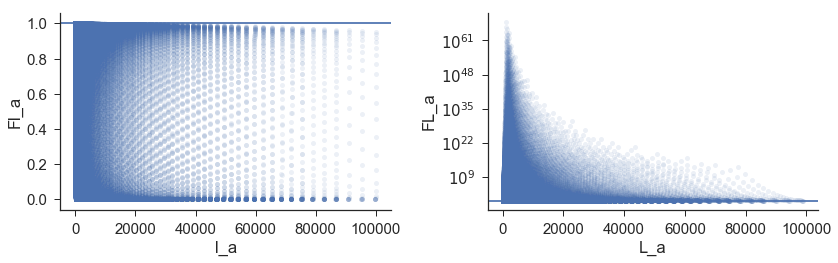

In [215]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
results.plot.scatter('l_a', 'Fl_a', ax=axes[0], alpha=0.1)
axes[0].axhline(1)
results.plot.scatter('L_a', 'FL_a', ax=axes[1], alpha=0.1)
axes[1].axhline(1)
axes[1].set_yscale('log')

fig.tight_layout()
sns.despine()

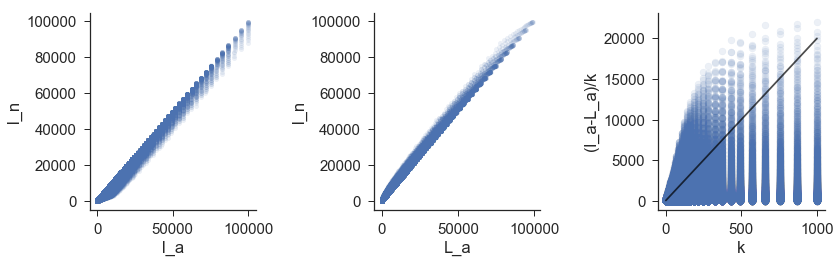

In [223]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
results.plot.scatter('l_a', 'l_n', ax=axes[0], alpha=0.1)
results.plot.scatter('L_a', 'l_n', ax=axes[1], alpha=0.1)
axes[2].scatter(results['k'], (results['l_a']-results['L_a']), alpha=0.1)
axes[2].plot(k, 20*k, color='k', alpha=0.7)
axes[2].set(xlabel='k', ylabel='(l_a-L_a)/k')
fig.tight_layout()
sns.despine()

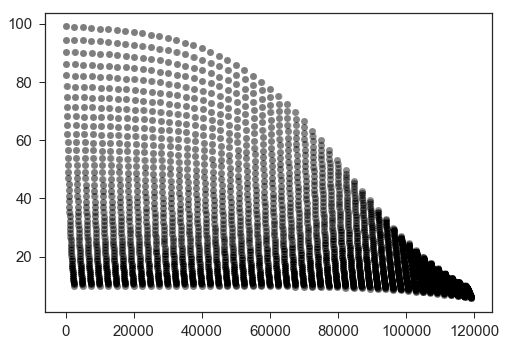

In [230]:
plt.plot(results['L_a']/results['k'], 'ok', alpha=0.01)

In [231]:
((results['L_a']/results['k'])>1).all()

True